In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg 
import catboost as cb
from sklearn.model_selection import GridSearchCV

In [2]:
import sklearn
print(sklearn.__version__)

1.0.2


In [3]:
df= pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
pd.DataFrame(df.corr()['SalePrice']).sort_values('SalePrice',ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [8]:
# finding non numeric columns:
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# L1 = df.select_dtypes(exclude='numerics')
L1 = df.select_dtypes(exclude='number')
c = L1.columns
c

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
# adding y (SalePrice) to non numeric columns
df_obj = df.loc[:,list(c)+['SalePrice']]
df_obj

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,175000
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,210000
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal,266500
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,142125


<AxesSubplot:xlabel='LotShape'>

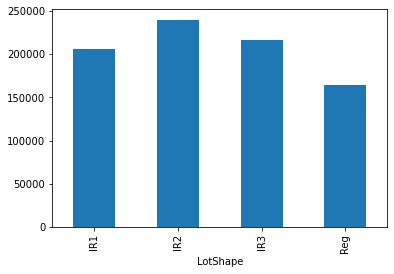

In [10]:
df_obj.groupby('LotShape')['SalePrice'].mean().plot(kind='bar')

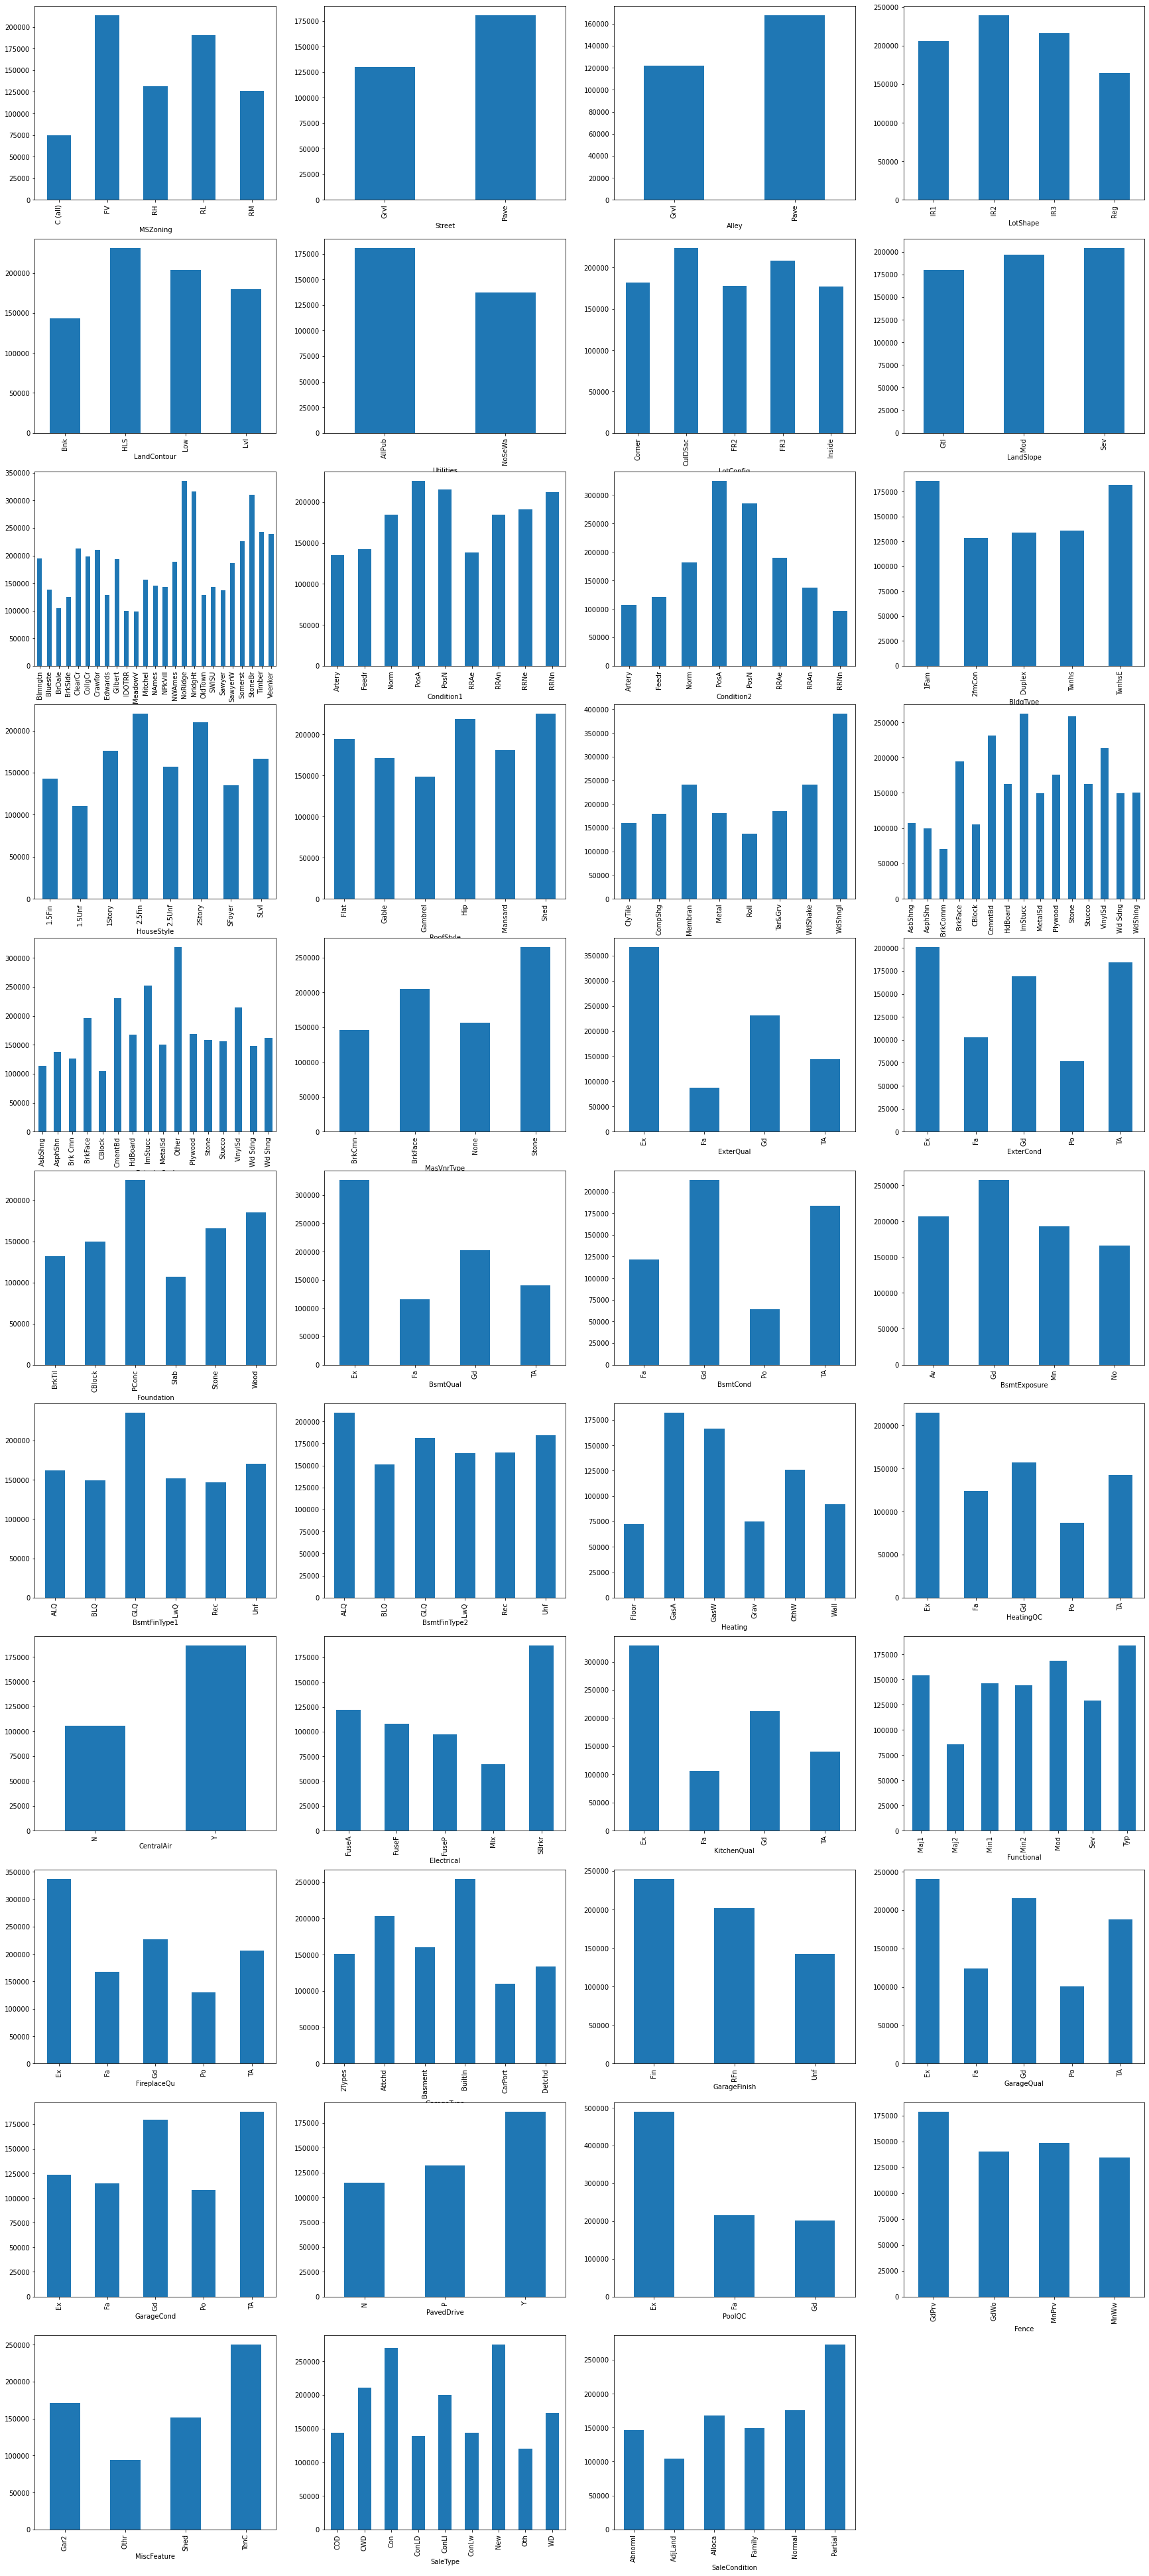

In [11]:
#1 chart for categorical features, i+1 shows where it wants to plot (from 1 to ...)
X = df_obj.columns
plt.figure(figsize=(30,70))
for i in range(0,len(X)-1):
    plt.subplot(int(len(X)/4),4,i+1)
    df_obj.groupby(X[i])['SalePrice'].mean().plot(kind='bar')

In [12]:
df['Utilities'].value_counts(dropna=False)

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

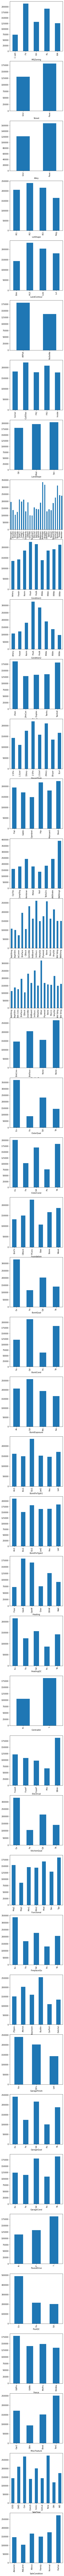

In [13]:
#2 chart for categorical features (the same as #1)

fig, axes = plt.subplots(len(c),1, figsize=(5,250))

for i in range(0,len(c)):
    df_obj.groupby(c[i])['SalePrice'].mean().plot(kind='bar', ax=axes[i])

In [14]:
df['MSSubClass'].dtype

dtype('int64')

In [15]:
df = df.rename(columns = {'MSSubClass':'type_of_house_in_sale'})

In [16]:
dic = {20:'1-STORY_1946&NEWER_ALL_STYLES', 30:'1-STORY_1945&OLDER', 40:'1-STORY_W/FINISHED_ATTIC_ALL_AGES', 45:'1-1/2_STORY-UNFINISHED_ALL_AGES', 50:'1-1/2_STORY_FINISHED_ALL_AGES', 60:'2-STORY_1946&NEWER', 70:'2-STORY_1945&OLDER', 75:'2-1/2_STORY_ALL_AGES', 80:'SPLIT_OR_MULTI-LEVEL', 85:'SPLIT_FOYER', 90:'DUPLEX-ALL_STYLES_AND_AGES', 120:'1-STORY_PUD_(Planned_Unit_Development)-1946&NEWER', 150:'1-1/2_STORY_PUD-ALL_AGES', 160:'2-STORY_PUD-1946&NEWER', 180:'PUD-MULTILEVEL-INCL_SPLIT_LEV/FOYER', 190:'2_FAMILY_CONVERSION-ALL_STYLES_AND_AGES'}

In [17]:
df=df.replace({"type_of_house_in_sale": dic})

In [18]:
df = df.rename(columns = {'MSZoning':'zoning_class_of_sale'})

In [19]:
dic = {'A':'Agriculture', 'C':'Commercial', 'FV':'Floating_Village_Residential', 'I':'Industrial', 'RH':'Residential_High_Density', 'RL':'Residential_Low_Density', 'RP':'Residential_Low_Density_Park', 'RM':'Residential_Medium_Density'}

In [20]:
df= df.replace({"zoning_class_of_sale":dic})

In [21]:
dic = {'Grvl':1, 'Pave':2, 'NaN':0}
df= df.replace({"Alley":dic})

In [22]:
dic = {'Reg':'Regular', 'IR1':'Slightly_irregular', 'IR2':'Moderately_irregular', 'IR3':'Irregular'}
df= df.replace({"LotShape":dic})

In [23]:
dic = {'Lvl': 'Near_Flat', 'Bnk': 'Quick/significant_rise', 'HLS': 'Hillside', 'Low': 'Depression'}
df= df.replace({"LandContour":dic})

In [24]:
dic = {'AllPub': 'All_Utilities', 'NoSewr': 'Electricity_Gas_Water_(Septic_Tank)', 'NoSeWa': 'Electricity_Gas', 'ELO': 'Electricity_only'}
df= df.replace({"Utilities":dic})

In [25]:
dic = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
df= df.replace({"ExterQual":dic})
df= df.replace({"ExterCond":dic})
df=df.replace({"KitchenQual":dic})
df=df.replace({"HeatingQC":dic})

In [26]:
dic = {'Ex': 105, 'Gd': 95, 'TA': 85, 'Fa': 75, 'Po': 65, 'NaN': 0}
df= df.replace({"BsmtQual":dic})

In [27]:
dic={'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NaN':0}
df=df.replace({"FireplaceQu":dic, "GarageQual":dic, "GarageCond":dic, "BsmtCond":dic})

In [28]:
dic = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NaN': 0}
df= df.replace({"BsmtExposure":dic})

In [29]:
dic = {'GLQ': 7, 'ALQ': 6, 'BLQ': 5, 'Rec': 4, 'LwQ': 3, 'Unf': 2, 'NaN': 1}
df= df.replace({"BsmtFinType1":dic})
df= df.replace({"BsmtFinType2":dic})

In [30]:
dic={'N':0, 'Y':1}
df=df.replace({"CentralAir":dic})

In [31]:
dic={'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1}
df=df.replace({"Functional":dic})

In [32]:
dic={'Fin':3, 'RFn':2, 'Unf':1, 'NaN':0}
df= df.replace({"GarageFinish":dic})

In [33]:
dic={'Y':2, 'P':1, 'N':0}
df=df.replace({"PavedDrive":dic})

In [34]:
dic={'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NaN':0}
df= df.replace({"PoolQC":dic})

In [35]:
dic={'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NaN':0}
df= df.replace({"Fence":dic})

In [36]:
L1 = df.select_dtypes(exclude='number')
c = L1.columns
c

Index(['type_of_house_in_sale', 'zoning_class_of_sale', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [37]:
df1 = df.copy()

In [38]:
df=df1.copy()

In [39]:
df['BsmtQual'].value_counts(dropna=False)

85.0     649
95.0     618
105.0    121
NaN       37
75.0      35
Name: BsmtQual, dtype: int64

In [40]:
pd.set_option('display.max_rows',243)

In [41]:
# number of NaN items in each column
L= df.shape[0]- df.count()
L

Id                          0
type_of_house_in_sale       0
zoning_class_of_sale        0
LotFrontage               259
LotArea                     0
Street                      0
Alley                    1369
LotShape                    0
LandContour                 0
Utilities                   0
LotConfig                   0
LandSlope                   0
Neighborhood                0
Condition1                  0
Condition2                  0
BldgType                    0
HouseStyle                  0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
RoofStyle                   0
RoofMatl                    0
Exterior1st                 0
Exterior2nd                 0
MasVnrType                  8
MasVnrArea                  8
ExterQual                   0
ExterCond                   0
Foundation                  0
BsmtQual                   37
BsmtCond                   37
BsmtExposure               38
BsmtFinTyp

In [42]:
L[L>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [43]:
L[L>0].index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [44]:
# the NaN values in these columns should be replaced by 0
#Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageFinish, GarageQual, GarageCond, PoolQC, Fence

In [55]:
filt= ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

In [56]:
df['BsmtFinType2'].value_counts(dropna=False)

2.0    1256
4.0      54
3.0      46
NaN      38
5.0      33
6.0      19
7.0      14
Name: BsmtFinType2, dtype: int64

In [57]:
df[filt] = df[filt].apply(lambda x: x.fillna(x.mean()))

In [58]:
df['BsmtFinType2'].value_counts(dropna=False)

2.000000    1256
4.000000      54
3.000000      46
2.280591      38
5.000000      33
6.000000      19
7.000000      14
Name: BsmtFinType2, dtype: int64

In [363]:
#df[filt] = df[filt].apply(lambda x: x.fillna(0))

In [364]:
# the NaN values in these columns should be replaced by sth else (median)
# LotFrontage , MasVnrArea, GarageYrBlt

In [59]:
filt= ['LotFrontage' , 'MasVnrArea', 'GarageYrBlt']

In [60]:
m_LotFrontage=df['LotFrontage'].mean()
m_LotFrontage

70.04995836802665

In [61]:
m_MasVnrArea=df['MasVnrArea'].mean()
m_MasVnrArea

103.68526170798899

In [62]:
m_GarageYrBlt=df['GarageYrBlt'].mean()
m_GarageYrBlt

1978.5061638868744

In [63]:
df[filt] = df[filt].apply(lambda x: x.fillna(x.mean()))

In [64]:
df['GarageYrBlt'].value_counts(dropna=False)

1978.506164    81
2005.000000    65
2006.000000    59
2004.000000    53
2003.000000    50
2007.000000    49
1977.000000    35
1998.000000    31
1999.000000    30
1976.000000    29
2008.000000    29
2000.000000    27
1968.000000    26
2002.000000    26
1950.000000    24
1993.000000    22
1958.000000    21
1966.000000    21
2009.000000    21
1965.000000    21
1962.000000    21
2001.000000    20
1970.000000    20
1996.000000    20
1957.000000    20
1954.000000    19
1997.000000    19
1978.000000    19
1960.000000    19
1995.000000    18
1994.000000    18
1974.000000    18
1964.000000    18
1959.000000    17
1990.000000    16
1963.000000    16
1956.000000    16
1967.000000    15
1969.000000    15
1979.000000    15
1980.000000    15
1988.000000    14
1940.000000    14
1920.000000    14
1972.000000    14
1973.000000    14
1961.000000    13
1971.000000    13
1992.000000    13
1955.000000    13
1953.000000    12
1948.000000    11
1987.000000    11
1989.000000    10
1925.000000    10
1981.00000

In [65]:
df.loc[df['GarageYrBlt'].isna(), 'GarageType']

Series([], Name: GarageType, dtype: object)

In [66]:
# the NaN values in these columns should be replaced by some explanation
# GarageType (No Garage), MiscFeature (Non)

In [67]:
df.loc[df['GarageType'].isna(), 'GarageType']= 'No Garage'

In [68]:
df.loc[df['MiscFeature'].isna(), 'MiscFeature']= 'Non'

In [69]:
df_cat= df.copy()

In [70]:
# the NaN values in these columns will be solved by dummies part (they will take 0 values for all categories)
# MasVnrType, Electrical


In [71]:
df['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [72]:
df['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [73]:
#dummy
mylist = list(c)
dummies = pd.get_dummies(df[mylist], prefix= mylist)
df.drop(mylist, axis=1, inplace = True)
df = pd.concat([df,dummies], axis =1 )

In [74]:
pd.set_option('display.max_columns',245)

In [75]:
df.head()

,Id,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,type_of_house_in_sale_1-1/2_STORY-UNFINISHED_ALL_AGES,type_of_house_in_sale_1-1/2_STORY_FINISHED_ALL_AGES,type_of_house_in_sale_1-STORY_1945&OLDER,type_of_house_in_sale_1-STORY_1946&NEWER_ALL_STYLES,type_of_house_in_sale_1-STORY_PUD_(Planned_Unit_Development)-1946&NEWER,type_of_house_in_sale_1-STORY_W/FINISHED_ATTIC_ALL_AGES,type_of_house_in_sale_2-1/2_STORY_ALL_AGES,type_of_house_in_sale_2-STORY_1945&OLDER,type_of_house_in_sale_2-STORY_1946&NEWER,type_of_house_in_sale_2-STORY_PUD-1946&NEWER,type_of_house_in_sale_2_FAMILY_CONVERSION-ALL_STYLES_AND_AGES,type_of_house_in_sale_DUPLEX-ALL_STYLES_AND_AGES,type_of_house_in_sale_PUD-MULTILEVEL-INCL_SPLIT_LEV/FOYER,type_of_house_in_sale_SPLIT_FOYER,type_of_house_in_sale_SPLIT_OR_MULTI-LEVEL,zoning_class_of_sale_C (all),zoning_class_of_sale_Floating_Village_Residential,zoning_class_of_sale_Residential_High_Density,zoning_class_of_sale_Residential_Low_Density,zoning_class_of_sale_Residential_Medium_Density,Street_Grvl,Street_Pave,LotShape_Irregular,LotShape_Moderately_irregular,LotShape_Regular,LotShape_Slightly_irregular,LandContour_Depression,LandContour_Hillside,LandContour_Near_Flat,LandContour_Quick/significant_rise,Utilities_All_Utilities,Utilities_Electricity_Gas,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heatin

In [77]:
df.loc[df['MasVnrArea'].isna(), 'MasVnrType']

KeyError: 'MasVnrType'

In [78]:
# Since we have some categories for some dummy columns in the test set (tes) which does not exist in the training set (df), we set them to 0 here in the df
# these columns are:
# Id --> we have it and will be delete it 
# 'Utilities_AllPub',
#'type_of_house_in_sale_1-1/2_STORY_PUD-ALL_AGES',
# 'zoning_class_of_sale_RL'

In [79]:
df['Utilities_AllPub']=0

In [80]:
df['type_of_house_in_sale_1-1/2_STORY_PUD-ALL_AGES']= 0
df['zoning_class_of_sale_RL']= 0

In [81]:
df['MasVnrArea'].value_counts(dropna=False)

0.000000      861
103.685262      8
72.000000       8
108.000000      8
180.000000      8
             ... 
562.000000      1
89.000000       1
921.000000      1
762.000000      1
119.000000      1
Name: MasVnrArea, Length: 328, dtype: int64

In [82]:
df2 = df.copy()

In [83]:
df = df2.copy()

In [84]:
del df['Id']

In [85]:
y= df['SalePrice']
X= df.drop(axis=1, columns='SalePrice')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

min_max_scaler = preprocessing.MinMaxScaler()

X_train_scaled = min_max_scaler.fit_transform(X_train)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)

X_test_scaled = min_max_scaler.transform(X_test)
y_pred = lasso_reg.predict(X_test_scaled)


C:\Users\enabi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.532e+10, tolerance: 6.234e+08
  model = cd_fast.enet_coordinate_descent(


In [86]:
lasso_reg.score(X_train_scaled, y_train)

0.9353875162557697

In [87]:
lasso_reg.score(X_test_scaled, y_test)

0.5711049325881894

In [88]:
importance = lasso_reg.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 29878.15385
Feature: 1, Score: 160062.56807
Feature: 2, Score: 2913.92062
Feature: 3, Score: 71639.32498
Feature: 4, Score: 31723.64371
Feature: 5, Score: 26554.68506
Feature: 6, Score: 2065.25781
Feature: 7, Score: 63225.01785
Feature: 8, Score: 13447.01616
Feature: 9, Score: -583.58940
Feature: 10, Score: 21496.55538
Feature: 11, Score: -16053.11653
Feature: 12, Score: 16748.72966
Feature: 13, Score: 3886.18118
Feature: 14, Score: 52869.52599
Feature: 15, Score: -3691.90399
Feature: 16, Score: 19327.22630
Feature: 17, Score: 22624.75319
Feature: 18, Score: 28873.12670
Feature: 19, Score: 6006.34182
Feature: 20, Score: -1258.22869
Feature: 21, Score: 118816.57947
Feature: 22, Score: 109990.24252
Feature: 23, Score: 43875.64894
Feature: 24, Score: 33905.61096
Feature: 25, Score: 9571.18676
Feature: 26, Score: 15911.54456
Feature: 27, Score: 14089.40555
Feature: 28, Score: 8794.84418
Feature: 29, Score: -37525.97815
Feature: 30, Score: -33449.69739
Feature: 31, Score:

In [89]:
model = SelectFromModel(lasso_reg, prefit=True)

In [90]:
X_train.shape

(1022, 245)

In [91]:
X_new = model.transform(X_train)
X_new.shape

C:\Users\enabi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(1022, 230)

In [92]:
X_new

array([[7.00499584e+01, 9.37500000e+03, 1.45054945e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.00499584e+01, 2.88700000e+03, 1.45054945e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.00000000e+01, 7.20700000e+03, 1.45054945e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [6.80000000e+01, 8.93000000e+03, 1.45054945e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.00499584e+01, 3.19600000e+03, 1.45054945e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.80000000e+01, 1.67700000e+04, 1.45054945e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [93]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [94]:
X_train.loc[:,model.get_support()].shape

(1022, 230)

In [95]:
X_train.shape

(1022, 245)

In [96]:
X_train.loc[:,~model.get_support()].columns

Index(['zoning_class_of_sale_Residential_High_Density', 'Street_Pave',
       'Utilities_Electricity_Gas', 'LotConfig_Corner', 'Condition2_PosA',
       'Condition2_RRAn', 'Condition2_RRNn', 'RoofMatl_ClyTile',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'Exterior2nd_CBlock',
       'MiscFeature_TenC', 'Utilities_AllPub',
       'type_of_house_in_sale_1-1/2_STORY_PUD-ALL_AGES',
       'zoning_class_of_sale_RL'],
      dtype='object')

In [97]:
y_new= df['SalePrice']
X_new= df.drop(axis=1, columns=['SalePrice','Street_Pave', 'Utilities_Electricity_Gas', 'LotConfig_Inside',
       'Condition2_PosA', 'Condition2_RRAn', 'Condition2_RRNn',
       'RoofStyle_Flat', 'RoofMatl_ClyTile', 'RoofMatl_Membran',
       'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Heating_GasA',
       'MiscFeature_TenC'])

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.3, random_state=0)

min_max_scaler = preprocessing.MinMaxScaler()

X_new_train_scaled = min_max_scaler.fit_transform(X_new_train)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_new_train_scaled, y_new_train)

X_new_test_scaled = min_max_scaler.transform(X_new_test)
y_new_pred = lasso_reg.predict(X_new_test_scaled)


C:\Users\enabi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.373e+10, tolerance: 6.234e+08
  model = cd_fast.enet_coordinate_descent(


In [98]:
lasso_reg.score(X_new_train_scaled, y_new_train)

0.9353875120153627

In [99]:
lasso_reg.score(X_new_test_scaled, y_new_test)

0.5710901149921025

In [100]:
model1 = SelectFromModel(lasso_reg, prefit=True)

In [101]:
model1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [102]:
X_new_train.loc[:,~model1.get_support()].columns

Index(['zoning_class_of_sale_Residential_High_Density', 'Utilities_AllPub',
       'type_of_house_in_sale_1-1/2_STORY_PUD-ALL_AGES',
       'zoning_class_of_sale_RL'],
      dtype='object')

In [103]:
# do not run this again!!!!!!!!!!!!
#y= df['SalePrice']
#X= df.drop(axis=1, columns='SalePrice')
#lasso = Lasso(alpha=0.1)

#min_max_scaler = preprocessing.MinMaxScaler()

#X_scaled = min_max_scaler.fit_transform(X)
#sfs_forward = SequentialFeatureSelector(lasso, n_features_to_select=50, direction='forward', cv=5).fit(X_scaled, y)

#sfs_backward = SequentialFeatureSelector(lasso, n_features_to_select=50, direction='backward', cv=5).fit(X_scaled, y)

#print("Features selected by forward sequential selection: "
#      f"{feature_names[sfs_forward.get_support()]}")
#print("Features selected by backward sequential selection: "
#      f"{feature_names[sfs_backward.get_support()]}")

In [104]:
y= df['SalePrice']
X= df.drop(axis=1, columns='SalePrice')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
svm_poly_reg = SVR(kernel="poly", degree=20, C=200, epsilon=15)
svm_poly_reg.fit(X_train_scaled, y_train)
X_test_scaled = min_max_scaler.transform(X_test)
y_pred= svm_poly_reg.predict(X_test_scaled)


In [105]:
svm_poly_reg.score(X_test_scaled, y_test)

0.6996753191972709

In [106]:
svm_poly_reg.score(X_train_scaled, y_train)

0.914698730857303

In [107]:
# linear SVR which did not perform well
y= df['SalePrice']
X= df.drop(axis=1, columns='SalePrice')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X_train_scaled, y_train)
X_test_scaled = min_max_scaler.transform(X_test)
y_pred= svm_reg.predict(X_test_scaled)

svm_reg.score(X_test_scaled, y_test)


-3.4331280294855633

In [108]:
# SVR
y= df['SalePrice']
X= df.drop(axis=1, columns='SalePrice')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
svm_rbf_reg = SVR(kernel="rbf", gamma='scale', C=250000)
svm_rbf_reg.fit(X_train_scaled, y_train)
X_test_scaled = min_max_scaler.transform(X_test)
y_pred= svm_rbf_reg.predict(X_test_scaled)
svm_rbf_reg.score(X_test_scaled, y_test)

0.8444171055073015

In [109]:
svm_rbf_reg.score(X_train_scaled, y_train)

0.9565528613028929

In [110]:
# RF
y= df['SalePrice']
X= df.drop(axis=1, columns='SalePrice')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
regr = RandomForestRegressor(max_depth=15, random_state=0)
regr.fit(X_train_scaled, y_train)
X_test_scaled = min_max_scaler.transform(X_test)
y_pred= regr.predict(X_test_scaled)
regr.score(X_test_scaled, y_test)

0.8534266303175772

In [111]:
regr.score(X_train_scaled, y_train)

0.9798034604973034

In [112]:
# XGB
y= df['SalePrice']
X= df.drop(axis=1, columns='SalePrice')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 23, seed = 123) 
xgb_r.fit(X_train_scaled, y_train) 
X_test_scaled = min_max_scaler.transform(X_test)
y_pred= xgb_r.predict(X_test_scaled)
xgb_r.score(X_test_scaled, y_test) 

[21:12:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


0.8263275520352512

In [113]:
xgb_r.score(X_train_scaled, y_train)

0.9914785236475603

In [114]:
y= df['SalePrice']
X= df.drop(axis=1, columns='SalePrice')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)


In [115]:
# CAT (without categorical features)

params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          
          'iterations':[100],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          #'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':[4]}
estimator_1=cb.CatBoostRegressor()
#Final_CLF_CAT = GridSearchCV(estimator=estimator, param_grid=params, cv=10, n_jobs=-1)
estimator_1.fit(X_train_scaled, y_train)
X_test_scaled = min_max_scaler.transform(X_test)
y_pred= estimator_1.predict(X_test_scaled)


Learning rate set to 0.041084
0:	learn: 76209.1192657	total: 148ms	remaining: 2m 27s
1:	learn: 74335.9264236	total: 153ms	remaining: 1m 16s
2:	learn: 72475.8030450	total: 158ms	remaining: 52.5s
3:	learn: 70770.3972913	total: 163ms	remaining: 40.6s
4:	learn: 69117.4835057	total: 168ms	remaining: 33.5s
5:	learn: 67669.5343426	total: 173ms	remaining: 28.7s
6:	learn: 66127.5121825	total: 179ms	remaining: 25.4s
7:	learn: 64534.2073450	total: 188ms	remaining: 23.3s
8:	learn: 63111.7788187	total: 195ms	remaining: 21.5s
9:	learn: 61615.3000546	total: 202ms	remaining: 20s
10:	learn: 60265.7940551	total: 209ms	remaining: 18.8s
11:	learn: 58899.2070158	total: 215ms	remaining: 17.7s
12:	learn: 57561.4491106	total: 222ms	remaining: 16.9s
13:	learn: 56332.4039023	total: 230ms	remaining: 16.2s
14:	learn: 55104.7849816	total: 236ms	remaining: 15.5s
15:	learn: 54020.3583317	total: 242ms	remaining: 14.9s
16:	learn: 52901.5760461	total: 249ms	remaining: 14.4s
17:	learn: 51870.5337905	total: 255ms	remaini

In [116]:
estimator_1.score(X_train_scaled, y_train) 

0.9955808433705828

In [117]:
estimator_1.score(X_test_scaled, y_test) 

0.887696836497289

In [118]:
# CAT (with categorical features)
# using df_cat

In [119]:
df_cat2= df_cat.copy()

In [120]:
df_cat= df_cat2.copy()

In [121]:
df_cat['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [122]:
df_cat['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [123]:
df_cat.loc[df_cat['MasVnrType'].isna(), 'MasVnrType']='Not'

In [124]:
df_cat.loc[df_cat['Electrical'].isna(), 'Electrical']='Not'

In [125]:
L2= df_cat.select_dtypes(exclude='number')

In [126]:
L2.columns

Index(['type_of_house_in_sale', 'zoning_class_of_sale', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [128]:
# CAT (with categorical features)
y= df_cat['SalePrice']
X= df_cat.drop(axis=1, columns='SalePrice')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          
          'iterations':[100],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          #'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':[4]}
estimator=cb.CatBoostRegressor()
#Final_CLF_CAT = GridSearchCV(estimator=estimator, param_grid=params, cv=10, n_jobs=-1)
estimator.fit(X_train, y_train, cat_features= ['type_of_house_in_sale', 'zoning_class_of_sale', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType',
       'SaleCondition'] )


Learning rate set to 0.041084
0:	learn: 76204.6857131	total: 36ms	remaining: 36s
1:	learn: 74223.1104610	total: 67.7ms	remaining: 33.8s
2:	learn: 72463.9299474	total: 106ms	remaining: 35.3s
3:	learn: 70792.5091127	total: 144ms	remaining: 35.8s
4:	learn: 69065.0689284	total: 183ms	remaining: 36.4s
5:	learn: 67371.8168653	total: 228ms	remaining: 37.8s
6:	learn: 65698.1002583	total: 268ms	remaining: 38s
7:	learn: 64371.6283074	total: 305ms	remaining: 37.9s
8:	learn: 62929.3980397	total: 345ms	remaining: 38s
9:	learn: 61414.4293139	total: 385ms	remaining: 38.1s
10:	learn: 59983.5815226	total: 434ms	remaining: 39s
11:	learn: 58772.0033026	total: 509ms	remaining: 41.9s
12:	learn: 57552.7227569	total: 598ms	remaining: 45.4s
13:	learn: 56177.6975489	total: 678ms	remaining: 47.7s
14:	learn: 55061.1497814	total: 732ms	remaining: 48s
15:	learn: 53906.0240592	total: 775ms	remaining: 47.7s
16:	learn: 52748.7964181	total: 817ms	remaining: 47.2s
17:	learn: 51665.0470204	total: 853ms	remaining: 46.6s


In [129]:
y_pred= estimator.predict(X_test)

In [130]:
estimator.score(X_train, y_train) 

0.9873000132623908

In [131]:
estimator.score(X_test, y_test) 

0.8901469777573263

In [132]:
df_cat.shape

(1460, 81)

In [133]:
filename = 'SVM.sav'
pickle.dump(svm_rbf_reg, open(filename, 'wb'))
filename = 'RF.sav'
pickle.dump(regr, open(filename, 'wb'))
filename = 'XGB.sav'
pickle.dump(xgb_r, open(filename, 'wb'))
filename = 'CAT.sav'
pickle.dump(estimator_1, open(filename, 'wb'))


NameError: name 'pickle' is not defined

In [134]:
predSVM = svm_rbf_reg.predict(X_train_scaled)
predRF = regr.predict(X_train_scaled)
predXGB = xgb_r.predict(X_train_scaled)
predCAT = estimator_1.predict(X_train_scaled)

In [135]:
preds = pd.DataFrame(
    {'predSVM': predSVM,
     'predRF': predRF,
     'predXGB': predXGB,
     'predCAT': predCAT,
    })

In [136]:
svr_rbf = SVR(kernel='rbf', gamma='scale', C=25000)
svr_rbf.fit(preds, y_train)


SVR(C=25000)

In [137]:
preds_test = pd.DataFrame(
    {'predSVM': svm_rbf_reg.predict(X_test_scaled),
     'predRF': regr.predict(X_test_scaled),
     'predXGB': xgb_r.predict(X_test_scaled),
     'predCAT': estimator_1.predict(X_test_scaled)
    })


In [138]:
svr_rbf.score(preds, y_train) 

0.9342520952502653

In [139]:
svr_rbf.score(preds_test, y_test) 

0.8554019765220486

In [140]:
preds

,predSVM,predRF,predXGB,predCAT
0,233897.915414,223088.752848,237175.234375,225465.340334
1,173000.121570,172323.015563,170190.078125,174734.263716
2,116499.981413,116715.886557,121709.546875,117631.257560
3,100393.849030,105159.419120,103677.445312,101101.466641
4,60000.074717,62608.440000,61617.878906,61756.368481
...,...,...,...,...
1017,326859.678554,333506.880000,339131.031250,337046.964853
1018,128000.100441,131346.910582,136259.656250,133758.975548
1019,112000.101461,122476.990082,123359.695312,115491.507672
1020,199409.645408,218677.137059,216776.281250,215204.085251


In [141]:
y_train

64      219500
682     173000
960     116500
1384    105000
1100     60000
         ...  
763     337000
835     128000
1216    112000
559     234000
684     221000
Name: SalePrice, Length: 1022, dtype: int64

In [142]:
tes = pd.read_csv('test.csv')

In [143]:
tes.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [144]:
#doing same data cleaning and data preparation for the test set

In [145]:
tes.shape

(1459, 80)

In [146]:
tes = tes.rename(columns = {'MSSubClass':'type_of_house_in_sale'})

In [147]:
dic = {20:'1-STORY_1946&NEWER_ALL_STYLES', 30:'1-STORY_1945&OLDER', 40:'1-STORY_W/FINISHED_ATTIC_ALL_AGES', 45:'1-1/2_STORY-UNFINISHED_ALL_AGES', 50:'1-1/2_STORY_FINISHED_ALL_AGES', 60:'2-STORY_1946&NEWER', 70:'2-STORY_1945&OLDER', 75:'2-1/2_STORY_ALL_AGES', 80:'SPLIT_OR_MULTI-LEVEL', 85:'SPLIT_FOYER', 90:'DUPLEX-ALL_STYLES_AND_AGES', 120:'1-STORY_PUD_(Planned_Unit_Development)-1946&NEWER', 150:'1-1/2_STORY_PUD-ALL_AGES', 160:'2-STORY_PUD-1946&NEWER', 180:'PUD-MULTILEVEL-INCL_SPLIT_LEV/FOYER', 190:'2_FAMILY_CONVERSION-ALL_STYLES_AND_AGES'}

In [148]:
tes=tes.replace({"type_of_house_in_sale": dic})

In [149]:
tes = tes.rename(columns = {'MSZoning':'zoning_class_of_sale'})

In [150]:
dic = {'A':'Agriculture', 'C':'Commercial', 'FV':'Floating_Village_Residential', 'I':'Industrial', 'RH':'Residential_High_Density', 'RL':'Residential_Low_Density', 'RP':'Residential_Low_Density_Park', 'RM':'Residential_Medium_Density'}

In [151]:
tes= tes.replace({"zoning_class_of_sale":dic})

In [152]:
dic = {'Grvl':1, 'Pave':2, 'NaN':0}
tes= tes.replace({"Alley":dic})

In [153]:
dic = {'Reg':'Regular', 'IR1':'Slightly_irregular', 'IR2':'Moderately_irregular', 'IR3':'Irregular'}
tes= tes.replace({"LotShape":dic})

In [154]:
dic = {'Lvl': 'Near_Flat', 'Bnk': 'Quick/significant_rise', 'HLS': 'Hillside', 'Low': 'Depression'}
tes= tes.replace({"LandContour":dic})

In [155]:
dic = {'AllPub': 'All_Utilities', 'NoSewr': 'Electricity_Gas_Water_(Septic_Tank)', 'NoSeWa': 'Electricity_Gas', 'ELO': 'Electricity_only'}
tes= tes.replace({"Utilities":dic})

In [156]:
dic = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
tes= tes.replace({"ExterQual":dic})
tes= tes.replace({"ExterCond":dic})
tes=tes.replace({"KitchenQual":dic})
tes=tes.replace({"HeatingQC":dic})

In [157]:
dic = {'Ex': 105, 'Gd': 95, 'TA': 85, 'Fa': 75, 'Po': 65, 'NaN': 0}
tes= tes.replace({"BsmtQual":dic})

In [158]:
dic={'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NaN':0}
tes=tes.replace({"FireplaceQu":dic, "GarageQual":dic, "GarageCond":dic, "BsmtCond":dic})

In [159]:
dic = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NaN': 0}
tes= tes.replace({"BsmtExposure":dic})

In [160]:
dic = {'GLQ': 7, 'ALQ': 6, 'BLQ': 5, 'Rec': 4, 'LwQ': 3, 'Unf': 2, 'NaN': 1}
tes= tes.replace({"BsmtFinType1":dic})
tes= tes.replace({"BsmtFinType2":dic})

In [161]:
dic={'N':0, 'Y':1}
tes=tes.replace({"CentralAir":dic})

In [162]:
dic={'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1}
tes=tes.replace({"Functional":dic})

In [163]:
dic={'Fin':3, 'RFn':2, 'Unf':1, 'NaN':0}
tes= tes.replace({"GarageFinish":dic})

In [164]:
dic={'Y':2, 'P':1, 'N':0}
tes=tes.replace({"PavedDrive":dic})

In [165]:
dic={'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NaN':0}
tes= tes.replace({"PoolQC":dic})

In [166]:
dic={'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NaN':0}
tes= tes.replace({"Fence":dic})

In [167]:
Lt = tes.select_dtypes(exclude='number')
ct = Lt.columns
ct

Index(['type_of_house_in_sale', 'zoning_class_of_sale', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [168]:
tes1 = tes.copy()

In [169]:
tes1.shape

(1459, 80)

In [170]:
tes=tes1.copy()

In [171]:
tes['BsmtQual'].value_counts(dropna=False)

85.0     634
95.0     591
105.0    137
75.0      53
NaN       44
Name: BsmtQual, dtype: int64

In [172]:
pd.set_option('display.max_rows',243)

In [173]:
# number of NaN items in each column
Lt= tes.shape[0]- tes.count()
Lt

Id                          0
type_of_house_in_sale       0
zoning_class_of_sale        4
LotFrontage               227
LotArea                     0
Street                      0
Alley                    1352
LotShape                    0
LandContour                 0
Utilities                   2
LotConfig                   0
LandSlope                   0
Neighborhood                0
Condition1                  0
Condition2                  0
BldgType                    0
HouseStyle                  0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
RoofStyle                   0
RoofMatl                    0
Exterior1st                 1
Exterior2nd                 1
MasVnrType                 16
MasVnrArea                 15
ExterQual                   0
ExterCond                   0
Foundation                  0
BsmtQual                   44
BsmtCond                   45
BsmtExposure               44
BsmtFinTyp

In [174]:
Lt[Lt>0]

zoning_class_of_sale       4
LotFrontage              227
Alley                   1352
Utilities                  2
Exterior1st                1
Exterior2nd                1
MasVnrType                16
MasVnrArea                15
BsmtQual                  44
BsmtCond                  45
BsmtExposure              44
BsmtFinType1              42
BsmtFinSF1                 1
BsmtFinType2              42
BsmtFinSF2                 1
BsmtUnfSF                  1
TotalBsmtSF                1
BsmtFullBath               2
BsmtHalfBath               2
KitchenQual                1
Functional                 2
FireplaceQu              730
GarageType                76
GarageYrBlt               78
GarageFinish              78
GarageCars                 1
GarageArea                 1
GarageQual                78
GarageCond                78
PoolQC                  1456
Fence                   1169
MiscFeature             1408
SaleType                   1
dtype: int64

In [175]:
Lt[Lt>0].index

Index(['zoning_class_of_sale', 'LotFrontage', 'Alley', 'Utilities',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [176]:
L[L>0].index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [177]:
# It seems that the test set has more columns wg=hich have null values. SO, we should go back to the training data preparation phase in order to get median for some of these columns inorder to replace ir=t for the test set null values.

In [178]:
#The difference between training coloumns and test coloumns which have null valuse
dif=set(['zoning_class_of_sale', 'LotFrontage', 'Alley', 'Utilities',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType']) - set(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'])
dif

{'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'Exterior1st',
 'Exterior2nd',
 'Functional',
 'GarageArea',
 'GarageCars',
 'KitchenQual',
 'SaleType',
 'TotalBsmtSF',
 'Utilities',
 'zoning_class_of_sale'}

In [179]:
len(dif)

15

In [180]:
tes['BsmtFinSF1'].value_counts(dropna=False)

0.0       462
24.0       15
276.0       6
602.0       6
300.0       5
         ... 
1337.0      1
656.0       1
706.0       1
496.0       1
337.0       1
Name: BsmtFinSF1, Length: 670, dtype: int64

In [181]:
tes.loc[tes['BsmtFinSF1'].isna()==True]

,Id,type_of_house_in_sale,zoning_class_of_sale,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,1-STORY_1946&NEWER_ALL_STYLES,Residential_Medium_Density,99.0,5940,Pave,NaN,Slightly_irregular,Near_Flat,All_Utilities,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,3,3,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,3,1,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,3.0,4,8.0,0,NaN,Detchd,1946.0,1.0,1.0,280.0,3.0,3.0,2,0,0,0,0,0,0,NaN,3.0,NaN,0,4,2008,ConLD,Abnorml


In [182]:
tes['zoning_class_of_sale'].dtype

dtype('O')

In [183]:
# float (we can replace the null values with the median of data in the whole training set)
'BsmtFinSF1'
'BsmtFinSF2'
'BsmtFullBath'
'BsmtHalfBath'
'BsmtUnfSF'
'Functional'
'GarageArea'
'GarageCars'
'KitchenQual'
'TotalBsmtSF'

'TotalBsmtSF'

In [184]:
BsmtFinSF1_med= df['BsmtFinSF1'].mean()
BsmtFinSF1_med

443.6397260273973

In [185]:
tes['BsmtFinSF1'].value_counts(dropna=False)

0.0       462
24.0       15
276.0       6
602.0       6
300.0       5
         ... 
1337.0      1
656.0       1
706.0       1
496.0       1
337.0       1
Name: BsmtFinSF1, Length: 670, dtype: int64

In [186]:
tes['BsmtFinSF1'].fillna(BsmtFinSF1_med, inplace=True)

In [187]:
tes['BsmtFinSF1'].value_counts(dropna=False)

0.0       462
24.0       15
276.0       6
602.0       6
300.0       5
         ... 
1337.0      1
656.0       1
706.0       1
496.0       1
337.0       1
Name: BsmtFinSF1, Length: 670, dtype: int64

In [188]:
tes.loc[tes['BsmtFinSF1'].isna()==True]

,Id,type_of_house_in_sale,zoning_class_of_sale,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [189]:
filt= ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'Functional', 'GarageArea', 'GarageCars', 'KitchenQual', 'TotalBsmtSF']

In [190]:
for i in filt:
    tes[i].fillna(df[i].mean(), inplace=True)

In [191]:
tes['GarageArea'].value_counts(dropna=False)

0.0       76
576.0     50
440.0     47
484.0     34
400.0     33
          ..
267.0      1
292.0      1
301.0      1
1488.0     1
682.0      1
Name: GarageArea, Length: 460, dtype: int64

In [192]:
df['GarageArea'].mean()

472.9801369863014

In [193]:
len(tes['GarageArea'])-tes['GarageArea'].count()

0

In [194]:
tes.loc[tes['GarageArea'].isna()==True]

,Id,type_of_house_in_sale,zoning_class_of_sale,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [195]:
#Object
'Exterior1st'
'Exterior2nd'
'SaleType'
'Utilities'
'zoning_class_of_sale'

'zoning_class_of_sale'

In [196]:
tes['Exterior1st'].value_counts(dropna=False)

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
NaN          1
CBlock       1
Name: Exterior1st, dtype: int64

In [197]:
tes['Exterior2nd'].value_counts(dropna=False)

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
NaN          1
Stone        1
Name: Exterior2nd, dtype: int64

In [198]:
tes['SaleType'].value_counts(dropna=False)

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
NaN         1
Name: SaleType, dtype: int64

In [199]:
tes['Utilities'].value_counts(dropna=False)

All_Utilities    1457
NaN                 2
Name: Utilities, dtype: int64

In [200]:
tes['zoning_class_of_sale'].value_counts(dropna=False)

Residential_Low_Density         1114
Residential_Medium_Density       242
Floating_Village_Residential      74
C (all)                           15
Residential_High_Density          10
NaN                                4
Name: zoning_class_of_sale, dtype: int64

In [201]:
# Since all of these columns has a few null values (most of them just 1 null), I replace the null with the most common category in the training set (mode)

In [202]:
#Since we do not have these column with these name in the training set now (because of getting dummy from them), so we should do the mode calculation before dummy and pay attention to the columns which got renamed.

In [214]:
d= pd.read_csv('train.csv')

In [215]:
d.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [216]:
filt2= ['Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities', 'zoning_class_of_sale']
# search for the initial name for these columns before renaming
fil2= ['Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities', 'MSZoning']

In [217]:
mod=[]
for j in fil2:
    mod.append(d[j].mode())
mod

[0    VinylSd
 Name: Exterior1st, dtype: object,
 0    VinylSd
 Name: Exterior2nd, dtype: object,
 0    WD
 Name: SaleType, dtype: object,
 0    AllPub
 Name: Utilities, dtype: object,
 0    RL
 Name: MSZoning, dtype: object]

In [218]:
mm=[]
for n in mod:
    mm.append(str(n).split()[1])
mm

['VinylSd', 'VinylSd', 'WD', 'AllPub', 'RL']

In [219]:
for i in range(len(filt2)):
    tes[filt2[i]].fillna(mm[i], inplace=True)

In [220]:
tes['Exterior1st'].value_counts(dropna=False)

VinylSd    511
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [221]:
# the NaN values in these columns should be replaced by 0
#Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageFinish, GarageQual, GarageCond, PoolQC, Fence

In [222]:
filt= ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

In [224]:
df['Alley'].mean()

1.4505494505494685

In [225]:
mea=[]
for j in filt:
    mea.append(df[j].mean())
mea

[1.4505494505494685,
 90.79761068165854,
 3.0112438510189756,
 1.673699015471167,
 4.63808854532677,
 2.2805907172995794,
 3.4610389610389274,
 1.8165337200870193,
 2.9753444525018122,
 2.9738941261783944,
 2.7142857142857566,
 2.9395017793594613]

In [226]:
for i in range(len(filt)):
    tes[filt[i]].fillna(mea[i], inplace=True)

In [227]:
# the NaN values in these columns should be replaced by sth else (median)
# LotFrontage , MasVnrArea, GarageYrBlt

In [228]:
filt= ['LotFrontage' , 'MasVnrArea', 'GarageYrBlt']

In [229]:
m_LotFrontage=df['LotFrontage'].mean()
m_LotFrontage

70.04995836802642

In [230]:
m_MasVnrArea=df['MasVnrArea'].mean()
m_MasVnrArea

103.68526170798896

In [231]:
m_GarageYrBlt=df['GarageYrBlt'].mean()
m_GarageYrBlt

1978.5061638868744

In [232]:
for i in filt:
    tes[i].fillna(df[i].mean(), inplace= True)

In [233]:
# the NaN values in these columns should be replaced by some explanation
# GarageType (No Garage), MiscFeature (Non)

In [234]:
tes.loc[tes['GarageType'].isna(), 'GarageType']= 'No Garage'

In [235]:
tes.loc[tes['MiscFeature'].isna(), 'MiscFeature']= 'Non'

In [236]:
tes.isnull().sum()

Id                        0
type_of_house_in_sale     0
zoning_class_of_sale      0
LotFrontage               0
LotArea                   0
Street                    0
Alley                     0
LotShape                  0
LandContour               0
Utilities                 0
LotConfig                 0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
BldgType                  0
HouseStyle                0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               0
Exterior2nd               0
MasVnrType               16
MasVnrArea                0
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                  0
BsmtCond                  0
BsmtExposure              0
BsmtFinType1              0
BsmtFinSF1                0
BsmtFinType2        

In [237]:
tes_cat= tes.copy()

In [238]:
# the NaN values in these columns will be solved by dummies part (they will take 0 values for all categories)
# MasVnrType, Electrical


In [239]:
tes['MasVnrType'].value_counts(dropna=False)

None       878
BrkFace    434
Stone      121
NaN         16
BrkCmn      10
Name: MasVnrType, dtype: int64

In [240]:
tes['Electrical'].value_counts(dropna=False)

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

In [241]:
L2 = tes.select_dtypes(exclude='number')
ct = L2.columns
ct

Index(['type_of_house_in_sale', 'zoning_class_of_sale', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [242]:
#dummy
mylist = list(ct)
dummies = pd.get_dummies(tes[mylist], prefix= mylist)
tes.drop(mylist, axis=1, inplace = True)
tes = pd.concat([tes,dummies], axis =1 )

In [243]:
pd.set_option('display.max_columns',245)

In [244]:
tes.head()

,Id,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,type_of_house_in_sale_1-1/2_STORY-UNFINISHED_ALL_AGES,type_of_house_in_sale_1-1/2_STORY_FINISHED_ALL_AGES,type_of_house_in_sale_1-1/2_STORY_PUD-ALL_AGES,type_of_house_in_sale_1-STORY_1945&OLDER,type_of_house_in_sale_1-STORY_1946&NEWER_ALL_STYLES,type_of_house_in_sale_1-STORY_PUD_(Planned_Unit_Development)-1946&NEWER,type_of_house_in_sale_1-STORY_W/FINISHED_ATTIC_ALL_AGES,type_of_house_in_sale_2-1/2_STORY_ALL_AGES,type_of_house_in_sale_2-STORY_1945&OLDER,type_of_house_in_sale_2-STORY_1946&NEWER,type_of_house_in_sale_2-STORY_PUD-1946&NEWER,type_of_house_in_sale_2_FAMILY_CONVERSION-ALL_STYLES_AND_AGES,type_of_house_in_sale_DUPLEX-ALL_STYLES_AND_AGES,type_of_house_in_sale_PUD-MULTILEVEL-INCL_SPLIT_LEV/FOYER,type_of_house_in_sale_SPLIT_FOYER,type_of_house_in_sale_SPLIT_OR_MULTI-LEVEL,zoning_class_of_sale_C (all),zoning_class_of_sale_Floating_Village_Residential,zoning_class_of_sale_RL,zoning_class_of_sale_Residential_High_Density,zoning_class_of_sale_Residential_Low_Density,zoning_class_of_sale_Residential_Medium_Density,Street_Grvl,Street_Pave,LotShape_Irregular,LotShape_Moderately_irregular,LotShape_Regular,LotShape_Slightly_irregular,LandContour_Depression,LandContour_Hillside,LandContour_Near_Flat,LandContour_Quick/significant_rise,Utilities_AllPub,Utilities_All_Utilities,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType

In [245]:
tes['MasVnrArea'].value_counts(dropna=False)

0.000000       877
103.685262      15
176.000000      10
144.000000       9
120.000000       8
              ... 
647.000000       1
1290.000000      1
495.000000       1
292.000000       1
382.000000       1
Name: MasVnrArea, Length: 304, dtype: int64

In [246]:
tes2 = tes.copy()

In [247]:
tes = tes2.copy()

In [248]:
# prediction of the test set

In [249]:
tes.shape

(1459, 230)

In [250]:
df.shape

(1460, 246)

In [251]:
diff_df= set(df.columns) - set(tes.columns)
diff_df

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'MiscFeature_TenC',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'SalePrice',
 'Utilities_Electricity_Gas'}

In [252]:
set(tes.columns) - set(df.columns)

{'Id'}

In [253]:
# Since the categories for the dummy columns are different for some features in test and training, so we should set 0 for the ones exists in training but not in test.
# And add to the training (set 0 for them) for ones exists in test not in training.
# The columns which added and set to 0 in the df:
# 'Utilities_AllPub',
#'type_of_house_in_sale_1-1/2_STORY_PUD-ALL_AGES',
# 'zoning_class_of_sale_RL'

In [254]:
#Now setting the columns existing in df and not in tes to 0 here in tes:

In [255]:
for i in list(diff_df):
    tes[i]=0

In [256]:
tes['RoofMatl_Roll'].value_counts(dropna=False)

0    1459
Name: RoofMatl_Roll, dtype: int64

In [257]:
set(df.columns) - set(tes.columns)

set()

In [258]:
set(tes.columns) - set(df.columns)

{'Id'}

In [259]:
tes3= tes.copy()

In [260]:
tes= tes3.copy()

In [261]:
#del tes['Id']

In [262]:
tes.shape

(1459, 247)

In [263]:
df.shape

(1460, 246)

In [264]:
tes['SalePrice'].value_counts(dropna=False)

0    1459
Name: SalePrice, dtype: int64

In [265]:
del tes['SalePrice']

In [266]:
tes.set_index('Id', inplace=True)

In [267]:
tes.shape

(1459, 245)

In [268]:
tes_scaled = min_max_scaler.transform(tes)
y_tes_RF= regr.predict(tes_scaled)

C:\Users\enabi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [269]:
y_tes_RF

array([123131.07159128, 152692.71166667, 180814.45410714, ...,
       156840.9890797 , 110829.65      , 215649.33      ])

In [270]:
df_RF_submit= pd.DataFrame(data=y_tes_RF, index= tes3['Id'], columns=['SalePrice'])

In [271]:
df_RF_submit.to_csv('submission1.csv')

In [272]:
tes_scaled = min_max_scaler.transform(tes)
y_pred_CAT_without= estimator_1.predict(tes_scaled)

C:\Users\enabi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [273]:
y_pred_CAT_without

array([111612.93584035, 150553.8859724 , 167766.30948348, ...,
       166999.56773425, 111533.57210179, 211495.23177509])

In [274]:
df_CAT_OUT_submit= pd.DataFrame(data=y_pred_CAT_without, index= tes3['Id'], columns=['SalePrice'])

In [275]:
df_CAT_OUT_submit

,SalePrice
Id,
1461,111612.935840
1462,150553.885972
1463,167766.309483
1464,169053.025225
1465,178769.857124
...,...
2915,110245.401882
2916,109331.352168
2917,166999.567734


In [276]:
df_CAT_OUT_submit.to_csv('submission2.csv')

In [277]:
y_xgb_pred= xgb_r.predict(tes_scaled)

In [278]:
y_xgb_pred

array([116024.84, 159853.98, 187474.25, ..., 165928.34, 116160.35,
       206872.06], dtype=float32)

In [279]:
df_xgb_submit= pd.DataFrame(data=y_xgb_pred, index= tes3['Id'], columns=['SalePrice'])

In [280]:
df_xgb_submit

,SalePrice
Id,
1461,116024.843750
1462,159853.984375
1463,187474.250000
1464,192407.375000
1465,223343.484375
...,...
2915,96448.679688
2916,100746.695312
2917,165928.343750


In [281]:
df_xgb_submit.to_csv('submission3.csv')

In [282]:
# CAT (with categorical features)
# using df_cat

In [283]:
tes_cat2= tes_cat.copy()

In [284]:
tes_cat= tes_cat2.copy()

In [285]:
tes_cat['MasVnrType'].value_counts(dropna=False)

None       878
BrkFace    434
Stone      121
NaN         16
BrkCmn      10
Name: MasVnrType, dtype: int64

In [286]:
tes_cat['Electrical'].value_counts(dropna=False)

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

In [287]:
tes_cat.loc[tes_cat['MasVnrType'].isna(), 'MasVnrType']='Not'

In [288]:
tes_cat.loc[tes_cat['Electrical'].isna(), 'Electrical']='Not'

In [289]:
L2= tes_cat.select_dtypes(exclude='number')

In [290]:
L2.columns

Index(['type_of_house_in_sale', 'zoning_class_of_sale', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [291]:
y_pred_CAT_with= estimator.predict(tes_cat)

In [292]:
df_CAT_with_submit= pd.DataFrame(data=y_pred_CAT_with, index= tes3['Id'], columns=['SalePrice'])

In [293]:
df_CAT_with_submit

,SalePrice
Id,
1461,114375.414475
1462,169135.161523
1463,189515.429031
1464,193218.923688
1465,188345.456641
...,...
2915,80095.514166
2916,80904.836697
2917,171718.235640


In [294]:
df_CAT_with_submit.to_csv('submission5.csv')